In [16]:
%matplotlib inline
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
# data = pd.read_csv('build/Run0_nt_DoseDist_t0.csv', skiprows=8, names=['edep', 'x', 'y', 'z'])
data = pd.DataFrame()
files = list(filter(
    lambda x: 'DoseDist_t' in x,
    os.listdir('build')))

for f in files:
    _ = pd.read_csv('build/%s' % f, skiprows=8, names=['edep', 'x', 'y', 'z'])
    data = data.append(_, ignore_index=True)

data = data.sort_values(by=['z'])
data['z'] -= data['z'].min()

In [18]:
data

,edep,x,y,z
0,0.000005,8.33588,-0.204397,0.000
43920,0.000078,0.14618,-5.798390,0.000
43924,0.000038,4.73289,-5.548590,0.000
44003,0.000755,-4.30584,0.157747,0.000
44004,0.000002,-4.30584,0.157748,0.000
...,...,...,...,...
4743,0.103497,5.50911,28.236700,69.855
4746,0.045491,5.50265,28.240700,69.858
4747,0.043024,5.50351,28.241300,69.859
4744,0.068609,5.50708,28.245100,69.862


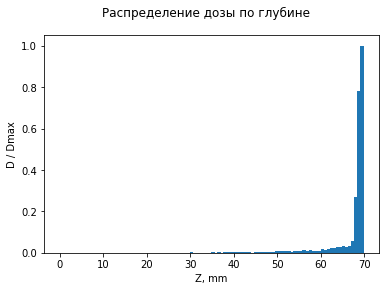

In [19]:
nz = 100
dz = (data['z'].max() - data['z'].min()) / nz

hist = pd.DataFrame([
    {'z': i + dz / 2, 'edep': data[(data['z'] > i) & (data['z'] < (i + dz))]['edep'].sum()}
    for i in np.arange(data['z'].min(), data['z'].max(), dz)
]
)

hist['edep'] /= hist['edep'].max()

d2plot = hist['edep'].values[::-1]
plt.bar(np.arange(len(d2plot)) * dz + dz / 2, d2plot)
# plt.plot(d2plot, 'o-')
hist['z'] = hist['z'].values[::-1]
hist.sort_values(by=['z']).to_csv('aDoseDepthHist.csv', index=False)
plt.ylabel('D / Dmax')
plt.xlabel('Z, mm')
plt.suptitle('Распределение дозы по глубине')
plt.savefig('aDoseDepthHist.png')

In [20]:
# hist['z'] = hist['z'].values[::-1]
hist

,z,edep
0,69.51269,1.000000
1,68.81407,0.780673
2,68.11545,0.270803
3,67.41683,0.057596
4,66.71821,0.030871
...,...,...
95,3.14379,0.000000
96,2.44517,0.000000
97,1.74655,0.000000
98,1.04793,0.000000


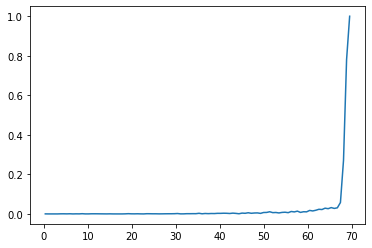

In [21]:
plt.plot(hist['z'], hist['edep'])